In [9]:
import sklearn.datasets as sk_data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score

In [18]:
def plotDisc(w):
    if abs(w[1])>abs(w[2]):
        yr = np.arange(-6,10,1)
        xr = -(w[2]*yr+w[0])/w[1]
        valid  = (xr>-4) & (xr<10)
        plt.plot(xr[valid], yr[valid],'k')
    else:
        xr = np.arange(-4,10,1)
        yr = -(w[1]*xr+w[0])/w[2]
        valid  = (yr>-6) & (yr<10)
        plt.plot(xr[valid], yr[valid],'k')


data = sk_data.load_iris()

In [19]:
df = pd.DataFrame(data=np.c_[data['data'], np.c_[data['target']]], columns= data['feature_names'] + ['target'])

In [20]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [21]:
df = df.drop(df[df.target == 2].index) # there were 3 classes, so i just dropped 1 to reduce complexity of explanation

colours = [ [ 'r', 'b' ][int(x)] for x in np.nditer(df['target'])] 


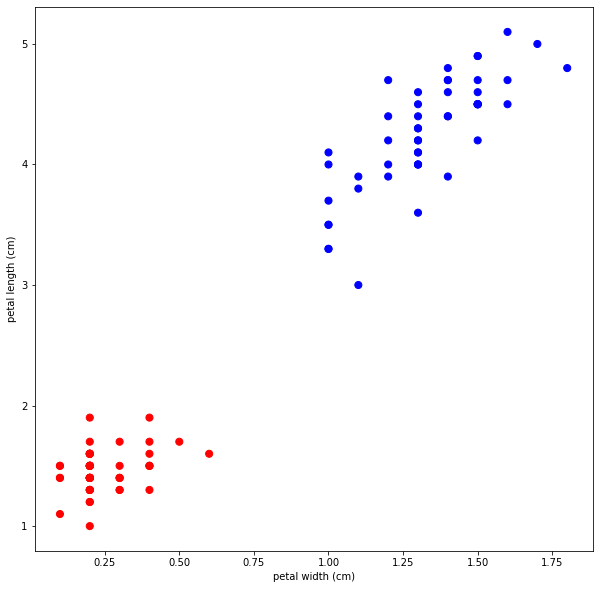

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(df['petal width (cm)'],df['petal length (cm)'],50, colours)
plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')
# plt.legend(['Setosa', 'Versicolor'])
plt.show()


## ML Implementation

In [23]:
def gradient_descent(inpu, theta, alpha, err):
    theta += alpha * (err) * inpu
    return theta

def mse(y, target):
    return 1/len(y) * np.sum((y - target)**2)

def mse_gd(x, theta, t, alpha):
    n = len(x)
    theta -= alpha * (2/n * (theta.dot(x.T) - t) * x)
    return theta

In [34]:
x0 = np.matrix([np.ones(len(df)), df['petal width (cm)'].values, df['petal length (cm)'].values])
w0 = np.matrix([-0.3, -0.2, -0.5]) # observe what happens if you run with different initial weights
target = df.target


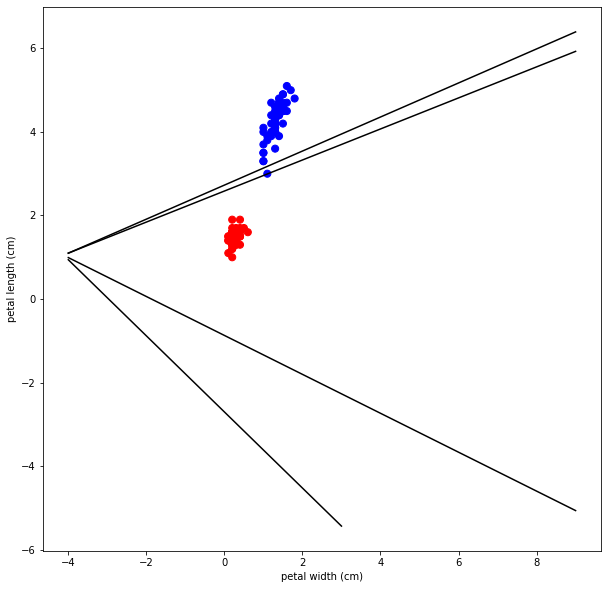

In [35]:
res = []

plt.figure(figsize=(10,10))
plt.scatter(df['petal width (cm)'],df['petal length (cm)'],50, colours)
plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')
# plt.show()

for i in range(400):
    for data_point in range(len(df)):
        pred = w0.dot([x0[0, data_point], x0[1, data_point], x0[2, data_point]])
        if pred >= 0:
            pred = 1
        else:
            pred = 0
        res.append(pred)
        err = target[data_point] - pred
        w0 = gradient_descent(x0.T[data_point], w0, 0.001, err)
    # if(i%5==0):
    plotDisc(np.array(w0)[0])
    if accuracy_score(res, target) >=0.99:
        break
    res = []
# print(w0)


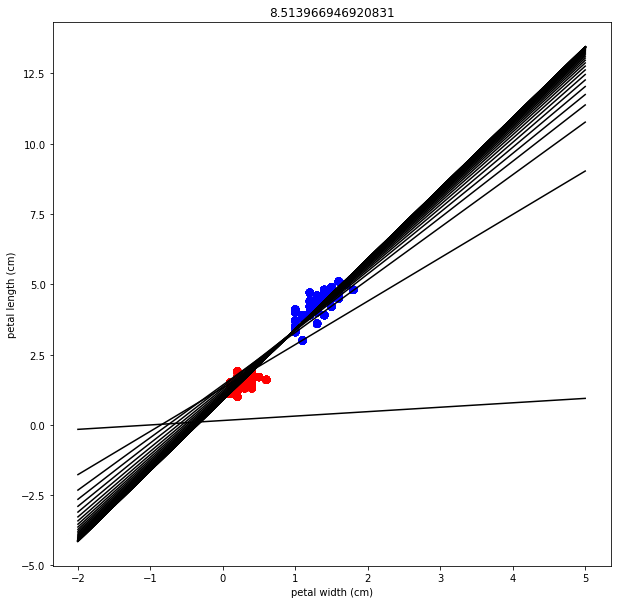

In [37]:
t = df['petal length (cm)'].values
points = np.linspace(-2, 5, 10)
res = []

x0 = np.matrix([np.ones(len(df)), df['petal width (cm)'].values])
w0 = np.matrix([0.1, 0.1])
plt.figure(figsize=(10,10))
max_iter = 3000
res = []
for data_point in range(max_iter):

        # pred = w0.dot([x0[0, data_point], x0[1, data_point]])

        w0 = mse_gd(x0.T, w0, t, 0.01)

        if(data_point%50==0):
                plt.plot(points, (np.array(w0.T[1] * points)[0]) + float(w0.T[0]), 'k')
                plt.scatter(df['petal width (cm)'],df['petal length (cm)'],50, colours)
                plt.xlabel('petal width (cm)')
                plt.ylabel('petal length (cm)')
                pred = np.array(w0.dot(x0))
                plt.title(mse(pred, t))
                # plt.show()
        # res.append(pred)
        

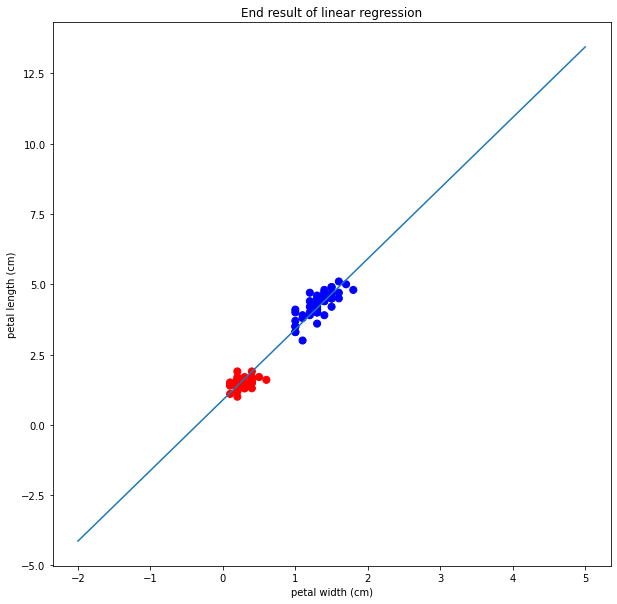

In [39]:
points = np.linspace(-2, 5, 10)
plt.figure(figsize=(10,10))
plt.scatter(df['petal width (cm)'],df['petal length (cm)'],50, colours)
plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')
plt.plot(points, (np.array(w0.T[1] * points)[0]) + float(w0.T[0]))
plt.title('End result of linear regression')
plt.show()